In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading data
data = pd.read_csv('/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv')
data

,Gmt time,Open,High,Low,Close,Volume
0,03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157,184.95
1,03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237,310.37
2,03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267,419.97
3,03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327,367.18
4,03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157,257.45
...,...,...,...,...,...,...
132187,01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132188,01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132189,01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132190,01.10.2022 22:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00


In [3]:
data.set_index('Gmt time')

,Open,High,Low,Close,Volume
Gmt time,,,,,
03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157,184.95
03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237,310.37
03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267,419.97
03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327,367.18
03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157,257.45
...,...,...,...,...,...
01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00


<AxesSubplot:>

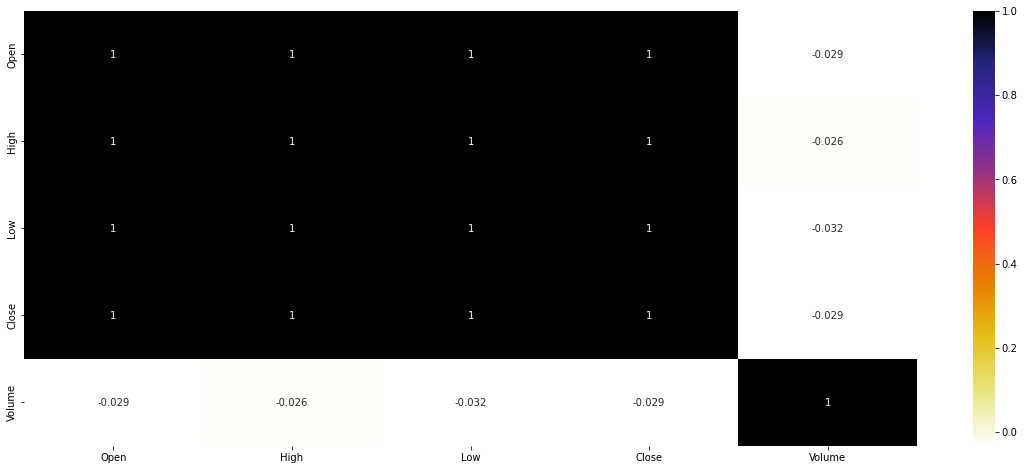

In [4]:
plt.figure(figsize=(20, 8))
cor = data.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)

In [5]:
# droping Open,High, Low since it high correlation with each other and dropping Volume since it has very low correlation.
data = data.drop({'Open', 'High', 'Low','Volume'}, axis=1)

In [6]:

# sum_inf = np.isinf(data).values.sum()
sum_nan = data.isna().sum()
# print("number of inf value present =", sum_inf)
print("number of nan value present =", sum_nan)


number of nan value present = Gmt time    0
Close       0
dtype: int64


In [7]:
print(len(data))
print("train=",len(data)*0.70)
print("val=", len(data)*0.15)
print("test=", len(data)*0.15)

132192
train= 92534.4
val= 19828.8
test= 19828.8


In [8]:
# Split dataset to train, val, test as 70%-15%-15%
train, temp = data[:92534], data[92534:] 
val, test = temp[:19828], temp[19828:] 
print(len(train), len(val), len(test))

92534 19828 19830


In [12]:
import numpy as np

def sampling_multi_target(n_steps_back, n_steps_future):
    import pandas as pd
    import numpy as np
    data = pd.read_csv('/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv')
    data.set_index('Gmt time')
    data = data.drop({'Open', 'High', 'Low','Volume'}, axis=1)
    train, temp = data[:92534], data[92534:] 
    val, test = temp[:19828], temp[19828:] 
    def sampleM(sequence):
        X, Y = list(), list()
        
        for i in range(len(sequence)):
            
            sam = i + n_steps_back
            fut = sam + n_steps_future
            if fut > len(sequence)-1:
                break
            x, y = sequence[i:sam], sequence[sam:fut]
            X.append(x)
            Y.append(y)
        return np.array(X), np.array(Y)

    train_X, train_Y = sampleM(train['Close'].tolist())
    val_X, val_Y = sampleM(val['Close'].tolist())
    test_X, test_Y = sampleM(test['Close'].tolist())
    return train_X, train_Y, val_X, val_Y, test_X, test_Y


In [13]:
n_steps_back = 60
n_steps_future=10

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_multi_target(n_steps_back, n_steps_future)

In [14]:
train_X[10]

array([0.81957, 0.82017, 0.82047, 0.82077, 0.82087, 0.82117, 0.82287,
       0.82257, 0.82117, 0.82037, 0.82067, 0.82487, 0.82397, 0.82447,
       0.82457, 0.82667, 0.82647, 0.82357, 0.82487, 0.82467, 0.82287,
       0.82417, 0.82357, 0.82547, 0.82437, 0.82407, 0.82267, 0.82187,
       0.82357, 0.82387, 0.82447, 0.82447, 0.82547, 0.82797, 0.82737,
       0.82727, 0.82437, 0.82497, 0.82377, 0.82377, 0.82237, 0.81907,
       0.82227, 0.82177, 0.82237, 0.82077, 0.81957, 0.81967, 0.82347,
       0.82427, 0.82567, 0.82447, 0.82227, 0.82277, 0.82157, 0.82157,
       0.82277, 0.82027, 0.82057, 0.82127])

In [15]:
train_Y[0]

array([0.82567, 0.82447, 0.82227, 0.82277, 0.82157, 0.82157, 0.82277,
       0.82027, 0.82057, 0.82127])

In [16]:

def sampling_1target(n_steps):
    import pandas as pd
    import numpy as np
    data = pd.read_csv('/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv')
    data.set_index('Gmt time')
    data = data.drop({'Open', 'High', 'Low','Volume'}, axis=1)
    train, temp = data[:92534], data[92534:] 
    val, test = temp[:19828], temp[19828:] 
    def sample(sequence):
        X, Y = list(), list()

        for i in range(len(sequence)):
            
            sam = i + n_steps
            if sam > len(sequence)-1:
                break
            x, y = sequence[i:sam], sequence[sam]
            X.append(x)
            Y.append(y)
        return np.array(X), np.array(Y)   
    train_X, train_Y = sample(train['Close'].tolist())
    val_X, val_Y = sample(val['Close'].tolist())
    test_X, test_Y = sample(test['Close'].tolist())
    return train_X, train_Y, val_X, val_Y, test_X, test_Y


In [17]:
n_steps = 60

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_1target(n_steps)

In [18]:
train_X[0]

array([0.82157, 0.82237, 0.82267, 0.82327, 0.82157, 0.82217, 0.82237,
       0.82137, 0.82137, 0.82157, 0.81957, 0.82017, 0.82047, 0.82077,
       0.82087, 0.82117, 0.82287, 0.82257, 0.82117, 0.82037, 0.82067,
       0.82487, 0.82397, 0.82447, 0.82457, 0.82667, 0.82647, 0.82357,
       0.82487, 0.82467, 0.82287, 0.82417, 0.82357, 0.82547, 0.82437,
       0.82407, 0.82267, 0.82187, 0.82357, 0.82387, 0.82447, 0.82447,
       0.82547, 0.82797, 0.82737, 0.82727, 0.82437, 0.82497, 0.82377,
       0.82377, 0.82237, 0.81907, 0.82227, 0.82177, 0.82237, 0.82077,
       0.81957, 0.81967, 0.82347, 0.82427])

In [19]:
train_X[1]

array([0.82237, 0.82267, 0.82327, 0.82157, 0.82217, 0.82237, 0.82137,
       0.82137, 0.82157, 0.81957, 0.82017, 0.82047, 0.82077, 0.82087,
       0.82117, 0.82287, 0.82257, 0.82117, 0.82037, 0.82067, 0.82487,
       0.82397, 0.82447, 0.82457, 0.82667, 0.82647, 0.82357, 0.82487,
       0.82467, 0.82287, 0.82417, 0.82357, 0.82547, 0.82437, 0.82407,
       0.82267, 0.82187, 0.82357, 0.82387, 0.82447, 0.82447, 0.82547,
       0.82797, 0.82737, 0.82727, 0.82437, 0.82497, 0.82377, 0.82377,
       0.82237, 0.81907, 0.82227, 0.82177, 0.82237, 0.82077, 0.81957,
       0.81967, 0.82347, 0.82427, 0.82567])

In [20]:
train_Y[0]

0.82567

In [21]:
# import numpy as np

# def sampling_1target(sequence, n_steps):

#     X, Y = list(), list()
    
#     for i in range(len(sequence)):
        
#         sam = i + n_steps
#         if sam > len(sequence)-1:
#             break
#         x, y = sequence[i:sam], sequence[sam]
#         X.append(x)
#         Y.append(y)
#     return np.array(X), np.array(Y)

# n_steps = 60

# train_X, train_Y = sampling_1target(train['Close'].tolist(), n_steps)
# val_X, val_Y = sampling_1target(val['Close'].tolist(), n_steps)
# test_X, test_Y = sampling_1target(test['Close'].tolist(), n_steps)



In [22]:
# import numpy as np

# def sampling_multi_target(sequence, n_steps_back, n_steps_future):

#     X, Y = list(), list()
    
#     for i in range(len(sequence)):
        
#         sam = i + n_steps_back
#         fut = sam + n_steps_future
#         if fut > len(sequence)-1:
#             break
#         x, y = sequence[i:sam], sequence[sam:fut]
#         X.append(x)
#         Y.append(y)
#     return np.array(X), np.array(Y)

# n_steps_back = 60
# n_steps_future=10

# train_X, train_Y = sampling_multi_target(train['Close'].tolist(), n_steps_back, n_steps_future)
# val_X, val_Y = sampling_multi_target(val['Close'].tolist(), n_steps_back, n_steps_future)
# test_X, test_Y = sampling_multi_target(test['Close'].tolist(), n_steps_back, n_steps_future)


In [ ]:
# import pandas as pd
# import yfinance as yf
# from yahoofinancials import YahooFinancials

In [ ]:
# yahoo_financials = YahooFinancials('GOOG')
# data = yahoo_financials.get_historical_price_data(start_date='2000-01-1', 
#                                                   end_date='2022-12-05', 
#                                                   time_interval='daily')
# goog_df = pd.DataFrame(data['GOOG']['prices'])
# goog_df = goog_df.drop('date', axis=1).set_index('formatted_date')
# df = goog_df.drop({'adjclose'}, axis=1)
# df.rename(columns={'high': 'High', 'low': 'Low','open': 'Open', 'close': 'Close','volume': 'Volume' }, inplace=True)
# df_save = df.to_csv('GOOG.csv')
# df